# PCA curve.Table 4 and Figure 7 from the paper.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pickle
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def plot_PCA_curve(all_feats, n_components, draw=None, ax=None, label=None, curve=True, verbose=False):
    
    pca = PCA(n_components=n_components, svd_solver='full')
    pca.fit(all_feats)
    if curve:
        print(np.cumsum(pca.explained_variance_ratio_)[:20])
    if verbose:
        print(len(pca.explained_variance_ratio_))
    if draw:
        if ax is None:
            plt.plot(np.cumsum(pca.explained_variance_ratio_[:11]))
        else:
            ax.plot(np.cumsum(pca.explained_variance_ratio_[:11]), label=label)

In [3]:
import os
folder_gen = './datasets/features/generated_art_features/'
folder_real = './datasets/features/real_art_features/'

### select analysis_type as 'gen' for generated art and 'real' for eral art.

In [16]:
analysis_type = 'gen'
if analysis_type == 'real':
    folder = folder_real
if analysis_type == 'gen':
    folder = folder_gen
files = os.listdir(folder)

In [17]:
if analysis_type == 'real':
    import pandas as pd
    from pathlib import Path
    from scipy.io import loadmat
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    df_1k = pd.read_csv('./datasets/processed/combined_wofflins_real.csv')
    df_5k = pd.read_csv('./datasets/processed/real_wofflin_scores_combined_normalised.csv')
    combined = [df_1k, df_5k]
    df = pd.concat(combined)
    df['name'] = df['Input.image'].apply(lambda x: Path(x).name)
    mat_file = loadmat('./datasets/processed/groundtruth_pruned.mat')
    files_im = [Path(f[0][0]).name for f in mat_file['groundtruth_pruned'][0][0][0]]
    real_indexes = [files_im.index(f) for f in df.name.values]

resnet101_plus2_StyleCAN1.pkl
24
resnet101_plus2_StyleCAN2.pkl
25
resnet101_plus2_StyleCWAN1.pkl
24
resnet101_plus2_StyleCWAN2.pkl
23
resnet101_plus2_StyleGAN1.pkl
24
resnet101_plus2_StyleGAN2.pkl
24
resnet101_StyleCAN1.pkl
170
resnet101_StyleCAN2.pkl
161
resnet101_StyleCWAN1.pkl
169
resnet101_StyleCWAN2.pkl
157
resnet101_StyleGAN1.pkl
166
resnet101_StyleGAN2.pkl
160
resnet50_plus2_StyleCAN1.pkl
25
resnet50_plus2_StyleCAN2.pkl
26
resnet50_plus2_StyleCWAN1.pkl
25
resnet50_plus2_StyleCWAN2.pkl
24
resnet50_plus2_StyleGAN1.pkl
25
resnet50_plus2_StyleGAN2.pkl
25
resnet50_StyleCAN1.pkl
177
resnet50_StyleCAN2.pkl
169
resnet50_StyleCWAN1.pkl
175
resnet50_StyleCWAN2.pkl
163
resnet50_StyleGAN1.pkl
172
resnet50_StyleGAN2.pkl
165
StyleCAN1_StyleCAN1.pkl
85
StyleCAN1_StyleCAN2.pkl
80
StyleCAN1_StyleCWAN1.pkl
90
StyleCAN1_StyleCWAN2.pkl
80
StyleCAN1_StyleGAN1.pkl
85
StyleCAN1_StyleGAN2.pkl
77
StyleCAN2_StyleCAN1.pkl
282
StyleCAN2_StyleCAN2.pkl
272
StyleCAN2_StyleCWAN1.pkl
286
StyleCAN2_StyleCWAN2.pk

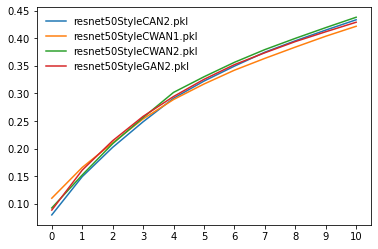

In [18]:
fig, ax = plt.subplots()
for idx,file in enumerate(files):        
    print(file)
    label=file.split('_')
    with open(os.path.join(folder, file), 'rb') as f:
        feats = pickle.load(f)
    if analysis_type == 'real':
        feats = feats[real_indexes]
    if label[0] == 'resnet50' and label[1] != 'StyleGAN1.pkl' and label[1] != 'StyleCAN1.pkl' and label[1] != 'plus2':
        plot_PCA_curve(feats, 0.95,ax=ax, label=label[0]+label[1], draw=True, curve=False, verbose=True)
    else:
        plot_PCA_curve(feats, 0.95,ax=ax, label=label[0]+label[1], draw=False, curve=False, verbose=True)
        
plt.xticks()
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 11, step=1))  # Set label locations.
# plt.xticks([])  # Disable
leg = ax.legend(loc='upper left', frameon=False)

### As the plot in the above cell is not clear, we make use of values obtained in the below cells and plot them [here](https://public.flourish.studio/visualisation/9014204/). To get the values, set curve=True.

### The plot using Resnet50 feature representations is [here](https://public.flourish.studio/visualisation/8915461/).

# For the figure in the paper we use feature representations from StyleGAN2.

In [7]:
folder = folder_gen
files = os.listdir(folder)

StyleGAN2_StyleCAN1.pkl
[0.19172609 0.28134602 0.3227271  0.35905334 0.39264503 0.41946855
 0.44073707 0.45928812 0.47567308 0.48933393 0.5021688  0.5143803
 0.5252355  0.53499913 0.5442392  0.5533568  0.5621187  0.57079107
 0.5788975  0.5868105 ]
207
StyleGAN2_StyleCAN2.pkl
[0.18301883 0.2833823  0.32452068 0.35973412 0.39111793 0.4211764
 0.44695973 0.4651443  0.48237702 0.4973759  0.5110077  0.5241102
 0.535368   0.5458815  0.55581635 0.5654576  0.5740289  0.5823053
 0.5902025  0.5979727 ]
199
StyleGAN2_StyleCWAN1.pkl
[0.16176032 0.21896216 0.25986373 0.29296952 0.3223434  0.34903556
 0.3698472  0.38835543 0.4058938  0.42104635 0.43525723 0.4493631
 0.46233398 0.47382015 0.4848712  0.4954475  0.5057635  0.5158966
 0.5251488  0.53407454]
221
StyleGAN2_StyleCWAN2.pkl
[0.1779452  0.23948346 0.28297684 0.32545274 0.36353385 0.39418966
 0.42081493 0.44312346 0.46167102 0.47836277 0.49287146 0.5065925
 0.5189216  0.5303861  0.540857   0.5511002  0.56066865 0.5697858
 0.57873017 0.58723915

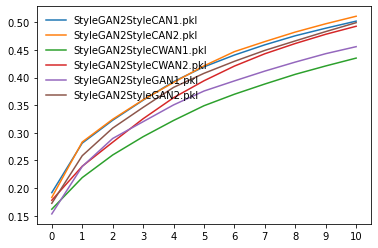

In [8]:
fig, ax = plt.subplots()
for idx,file in enumerate(files):        
    label=file.split('_')
    if label[0] == 'StyleGAN2':
        print(file)
        with open(os.path.join(folder, file), 'rb') as f:
            feats = pickle.load(f)
        plot_PCA_curve(feats, 0.95,ax=ax, label=label[0]+label[1], draw=True, curve=True, verbose=True)
plt.xticks()
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 11, step=1))  # Set label locations.
leg = ax.legend(loc='upper left', frameon=False)

## Real art with 400 samples and 10 tries

In [9]:
folder = folder_real
files = os.listdir(folder)

In [10]:
with open(os.path.join(folder, files[8]), 'rb') as f:
            feats = pickle.load(f)
features = feats[real_indexes]

In [11]:
def random_PCA_curve(all_feats, n_components):
    pca = PCA(n_components=n_components, svd_solver='full')
    pca.fit(all_feats)
    print(np.cumsum(pca.explained_variance_ratio_)[:20])
    return np.cumsum(pca.explained_variance_ratio_)

In [12]:
import random
variance = []
for i in range(10):
    indexes=random.sample(range(1, features.shape[0]-1), 400)    
    variance.append(random_PCA_curve(features[indexes], 0.95))

[0.20688505 0.31603968 0.35867995 0.39367044 0.42638028 0.45452398
 0.4730131  0.48902205 0.50470364 0.51898724 0.5311255  0.5429003
 0.55347914 0.5633253  0.57294405 0.5816567  0.5896984  0.59758854
 0.6049106  0.6119928 ]
[0.19299209 0.27971828 0.3311607  0.36457992 0.39386648 0.42156097
 0.44084892 0.4577782  0.4736115  0.48877737 0.5028134  0.5161227
 0.5277021  0.5389454  0.5493466  0.55919355 0.56840885 0.57703453
 0.585395   0.59319   ]
[0.22318129 0.29681045 0.34357512 0.38599375 0.41878012 0.44549116
 0.46726534 0.48434934 0.4998933  0.51485    0.5282688  0.5404962
 0.5519971  0.5627029  0.5727188  0.582316   0.5911687  0.5995578
 0.60762525 0.6152149 ]
[0.2022815  0.29593006 0.3457974  0.38699877 0.41622838 0.44249532
 0.46579137 0.48537338 0.5025327  0.5168749  0.53057766 0.5434538
 0.55529463 0.5657695  0.57565296 0.5853963  0.59449106 0.6027602
 0.6103228  0.6178192 ]
[0.20203547 0.3035563  0.3423046  0.37654102 0.40762797 0.4347484
 0.4536954  0.47109246 0.48784938 0.5020

In [13]:
average_ratio = np.zeros((25))

In [14]:
for i in variance:
    for idx,ratio in enumerate(i):
        if idx>=25:
            break
        average_ratio[idx]+=ratio
#         print(idx,ratio)|

In [15]:
average_ratio/10

array([0.20067618, 0.29499537, 0.3412237 , 0.37987654, 0.41112172,
       0.43855183, 0.46007549, 0.47773598, 0.4938542 , 0.50840971,
       0.5216969 , 0.53400783, 0.54540538, 0.55598677, 0.56596282,
       0.57530969, 0.58405188, 0.59233671, 0.6002287 , 0.60783442,
       0.6151618 , 0.62214144, 0.62887507, 0.63535836, 0.64158425])